# Minimizing Churn Rate Through Analysis of Financial Habits


### Background

Subscription products often are the main source of revenue for companies across all industries. These products can come in the form of a "one size fits all" overcompassing subscription, or in multi level memberships. Regardless of how they structure their memberships, or what industry they are in, companies almost always try to minimize customer churn (aka subscription cancellations).

To retain their customers, companies first need to identify behavioral patterns that act as catalyst in disengagement with the product. 

* Market: The target audience is the entirety of a company's subscription base. They are the ones companies want to keep. 

* Product: The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten


### Objective

The objective of this model is to find out which users are likely to churn, so that the company focus on re-engaging these users with the product. These efforts can be email reminders about the benefit of the product, especially focusing on features that are new or that user has shown to value


In this case study we will be working for a fintech company that provides a subscription product to its users, which allows them to manage their Bank accounts (saving account, credit cards etc.), provides them with personalized coupons, informs them about latest low APR-loans available in the market, and educates them on the best available methods to save money (like free courses on financial health etc.)




In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

dataset = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30

## Exploratory data analysis


Now, we will do some Exploratory Data Analysis (EDA) which is an approach for data analysis that employs a variety of techniques to:

* maximize insight into a data set
* uncover underlying structure
* extract important variables
* detect outliers and anomalies
* test underlying assumptions
* develop parsimonious models
* determine optimal factor settings

In [242]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [243]:
dataset.head(5)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [244]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


Few quick things to note:

* 41% of users have churned
* 32 is the average age of the users
    

In [245]:
dataset.shape

(27000, 31)

In [246]:
dataset.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned      

** Data Cleaning: ** Next step, we will clean the data and than continue with more EDA

In [247]:
dataset[dataset.credit_score < 300]
dataset = dataset[dataset.credit_score >= 300]

In [248]:
#Check null values
dataset.isna().sum()

user                          0
churn                         0
age                           0
housing                       0
credit_score                  0
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             1190
reward_rate                   0
is_referred                   0
dtype: i

Credit score and rewards earned have significant amount of null values. We will drop them from our model.

In [249]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

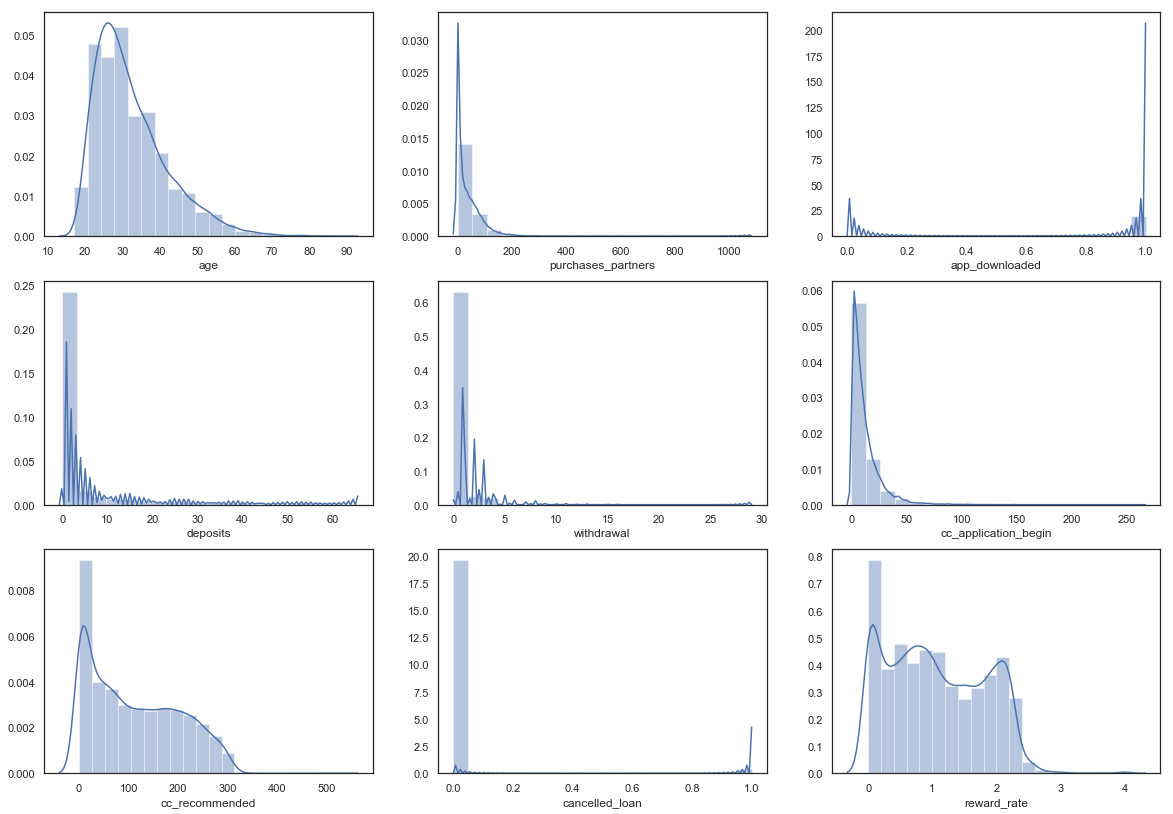

In [250]:
# Features Histograms
fig, ax = plt.subplots(3,3, figsize=(20, 14))
sns.distplot(dataset.age, bins = 20, ax=ax[0,0])  
sns.distplot(dataset.purchases_partners, bins = 20, ax=ax[0,1]) 
sns.distplot(dataset.app_downloaded, bins = 20, ax=ax[0,2]) 
sns.distplot(dataset.deposits, bins = 20, ax=ax[1,0]) 
sns.distplot(dataset.withdrawal, bins = 20, ax=ax[1,1]) 
sns.distplot(dataset.cc_application_begin, bins = 20, ax=ax[1,2]) 
sns.distplot(dataset.cc_recommended, bins = 20, ax=ax[2,0]) 
sns.distplot(dataset.cancelled_loan, bins = 20, ax=ax[2,1]) 
sns.distplot(dataset.reward_rate, bins = 20, ax=ax[2,2]) 
plt.show()

Few things to note:

* Age: Distribution is right skewed, intuitively it makes sense as older people don't use the services
* Deposit/withdrawal: Majority of people have no deposit (as the data we have is for first couple of months, and for this time period, activity could be low)

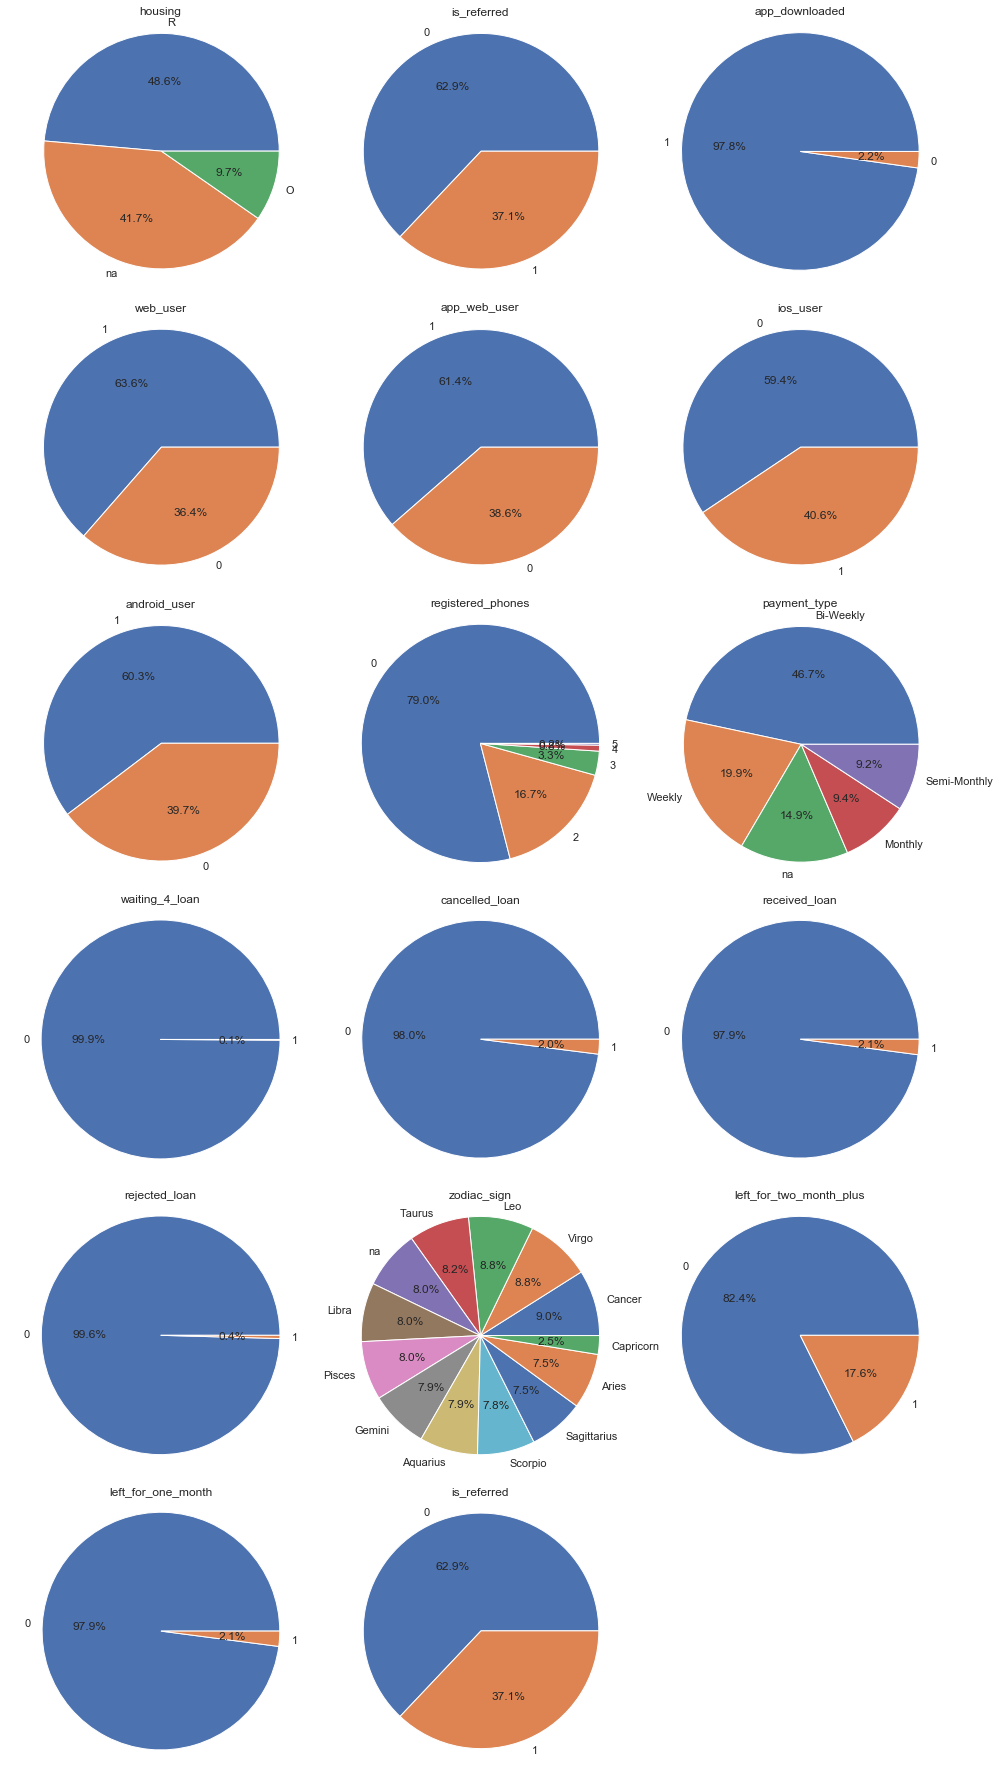

In [251]:
## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
#plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 0.9, 2.1])
plt.show()

Few things we notice:

* Housing: Majority of users are not owners. There's good amount of renters. Most of them are unclassified
* Payment type: Biweekly is most common
* Zodiac sign: Pretty evenly distributed, except for perhaps Capricorn

Interesting to note is features like : 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan' and left_for_one_month'are unevenly distributed. We will try to explore more to make sure these features will be useful to build our models


In [252]:
## Exploring Uneven Features
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    15
1     3
Name: churn, dtype: int64

In [253]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

0    194
1    187
Name: churn, dtype: int64

In [254]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    233
0    162
Name: churn, dtype: int64

In [255]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()


1    64
0    17
Name: churn, dtype: int64

In [256]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    207
0    184
Name: churn, dtype: int64

These are pretty balanced distribution and we do not see any strong reason that these fields are biased.

Next, we will check the correlation with Response variable

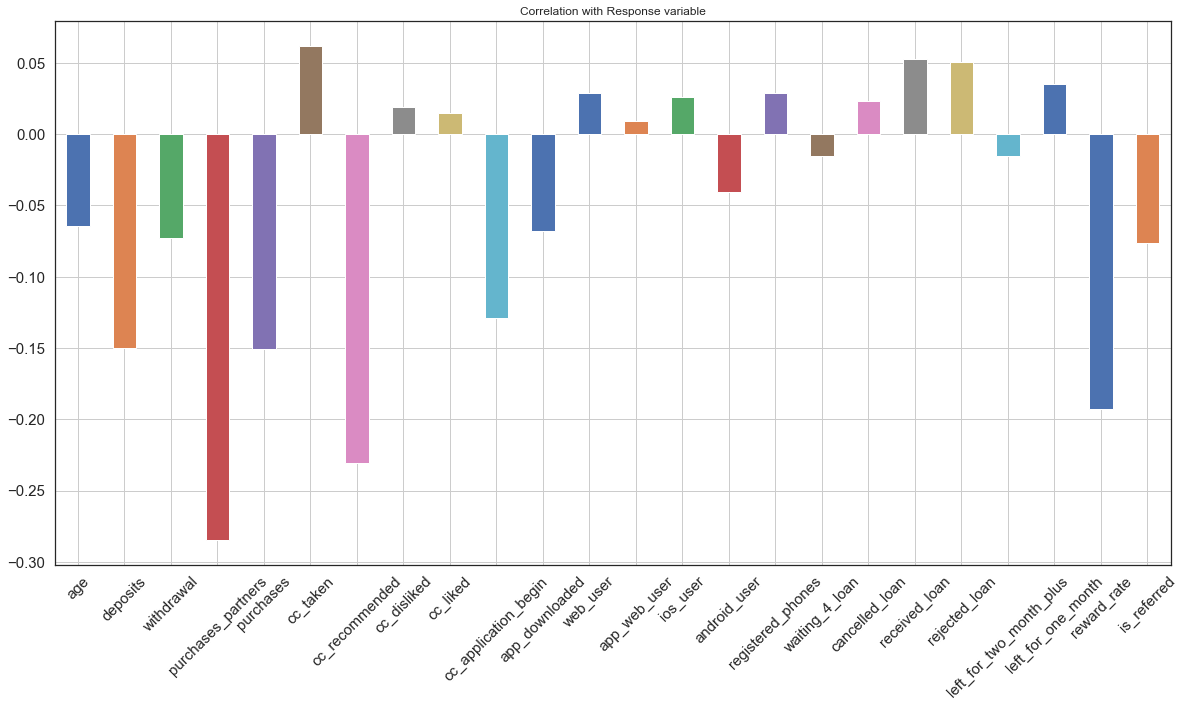

In [257]:
## Correlation with Response Variable
dataset_corr = dataset.drop(columns = ['churn', 'user']) #drop columns

dataset_corr.corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)
plt.show()

Age is negatively correlated to the response variable churn, smaller the age - more likely for it to be 1 (or churn). 

Same with deposits and withdrawal. Smaller the deposits or withdrawal  - more likely for users to churn. This makes sense, because this means that less activity user has, more likely they will churn. 



Interestingly, 'cc_taken' is correlated with churn, meaning if user has taken a credit card, they are more likely to churn (aka they are not happy with Credit card). This will be interesting to explore further.


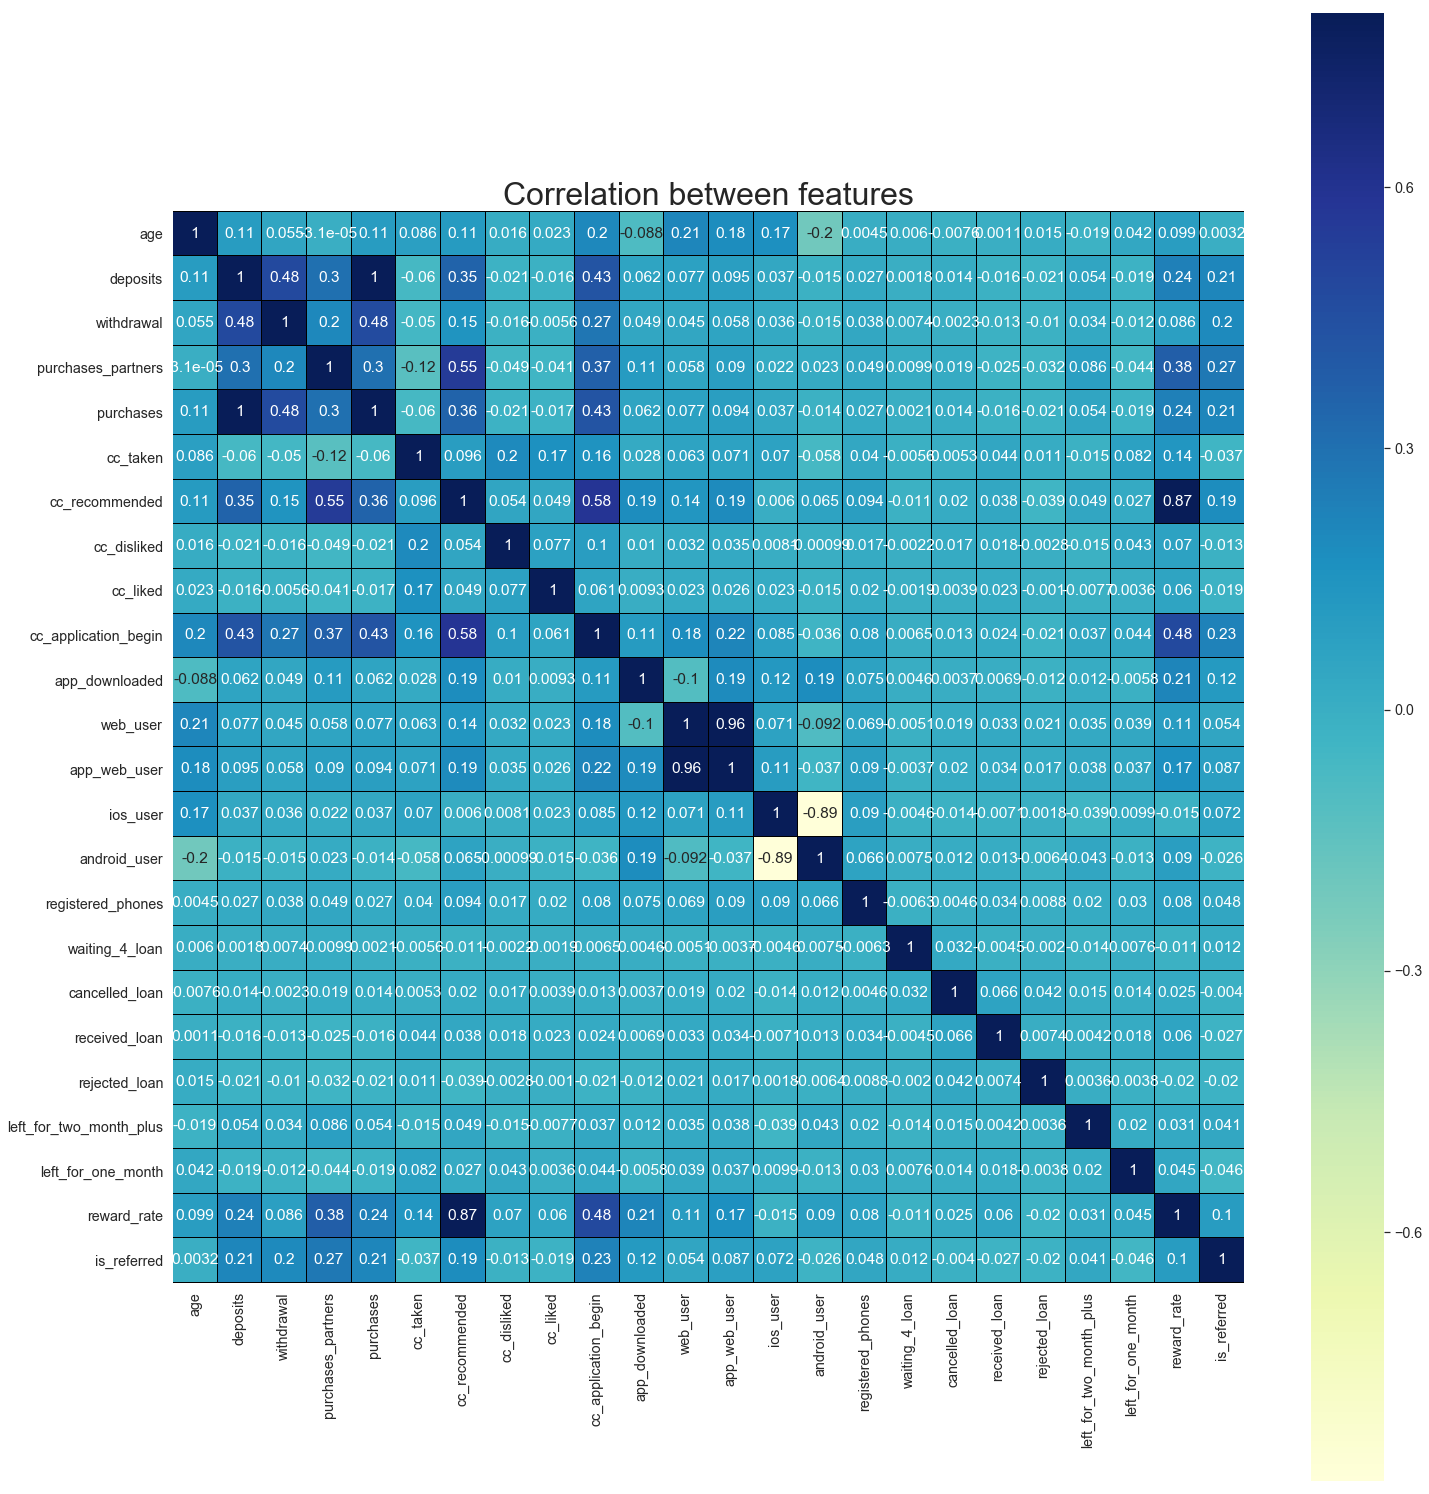

In [258]:
#Correlation matrix

corr=dataset_corr.corr()

sns.set(font_scale=1.3)
plt.figure(figsize=(24, 27))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features', fontsize = '32')
plt.show()

Obviously, best case scenario would be every feature is independent of each other and matrix above is marked around '0' meaning that they are not linearly related. 

However, that is not the case here. As we see in the matrix, correlation between 'android user' and 'ios user' is very strong. This makes sense, as if you are an android user, you are likely not a ios user. Correlation is not exactly 1 as there are probably users who have both. We will drop one of the column as it is not bringing any new information.

Additionaly,  'app_web_user' field is 1 when 'web_user' and 'app downloaded' both are '1' (aka its a function of the two fields) which makes it not an independent variable. As we want independent variables, we will drop this field. 

In [259]:
# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])
dataset = dataset.drop(columns = ['ios_user'])

In [260]:
## Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

### One hot encoding

We will use One hot encoding which is a simple process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [261]:
# One-Hot Encoding
dataset.housing.value_counts()
dataset.groupby('housing')['churn'].nunique().reset_index()
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [262]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [263]:
# Balancing the Training Set
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [264]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Model building

In [265]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [266]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [267]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.6399


In [268]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.652 (+/- 0.023)


In [269]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.164204
1,deposits,0.034083
2,withdrawal,0.031360
3,purchases_partners,-0.761356
4,purchases,-0.188282
5,cc_taken,0.043743
6,cc_recommended,0.069329
7,cc_disliked,0.035589
8,cc_liked,-0.003735
9,cc_application_begin,0.100384


In [270]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [271]:
# Model to Test
classifier = LogisticRegression()

In [272]:
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

In [273]:
# summarize the selection of the attributes
print(rfe.support_)

[ True False False  True  True  True  True False False  True  True  True
  True  True False  True  True  True False  True  True  True  True  True
 False False False  True False False False  True False False False False
 False False False False]


In [274]:
print(rfe.ranking_)

[ 1  9  7  1  1  1  1  5 18  1  1  1  1  1 15  1  1  1 12  1  1  1  1  1
  3  2  4  1 20  8 10  1 13 16 19  6 14 21 17 11]


In [275]:
X_train.columns[rfe.support_]

Index(['age', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_application_begin', 'app_downloaded', 'web_user', 'android_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'payment_type_Weekly', 'zodiac_sign_Capricorn'],
      dtype='object')

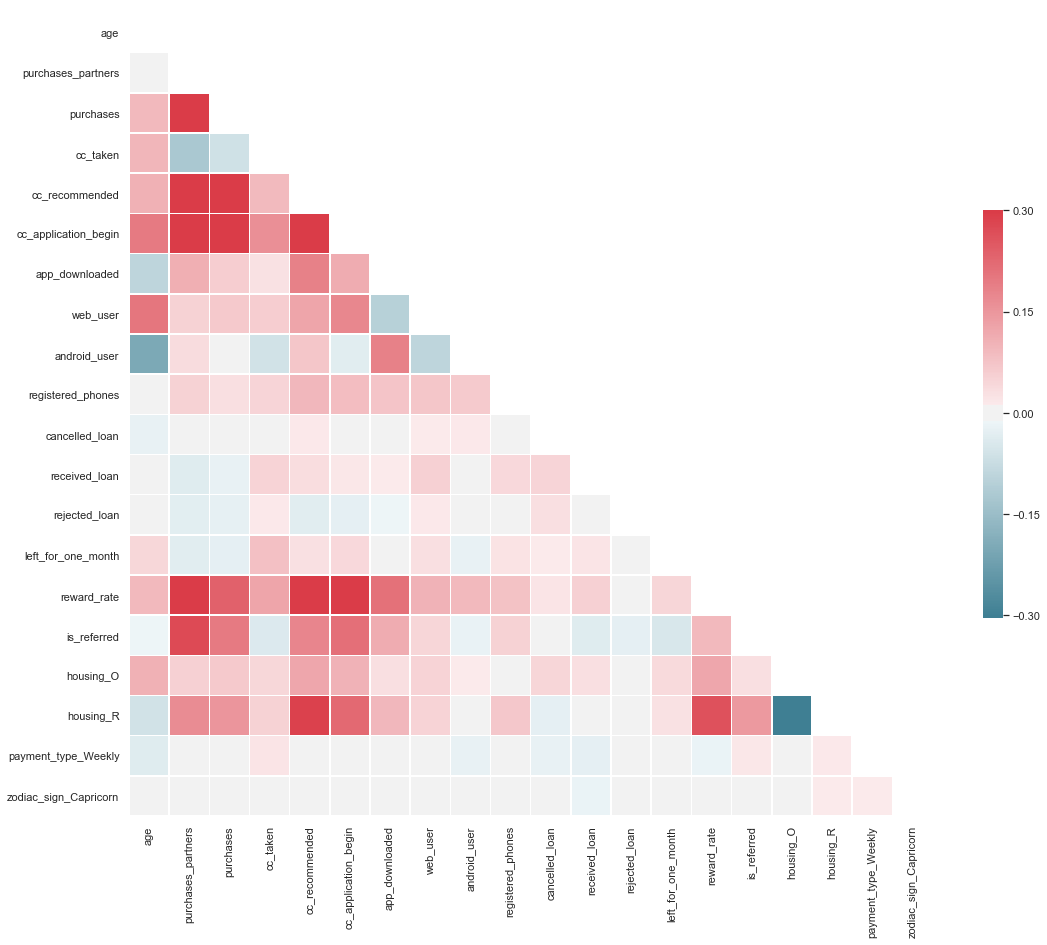

In [277]:
# New Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    
plt.show()

In [278]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [279]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [280]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

0.6318327974276529

In [281]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.6378


In [282]:
 #Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))


SVM Accuracy: 0.651 (+/- 0.027)


In [283]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.164930
1,purchases_partners,-0.753390
2,purchases,-0.139449
3,cc_taken,0.050407
4,cc_recommended,0.071737
5,cc_application_begin,0.104003
6,app_downloaded,-0.057866
7,web_user,0.147560
8,android_user,-0.051496
9,registered_phones,0.099842


In [284]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
final_results

,user,churn,predicted_churn
0,20839,0.0,1
1,15359,1.0,0
2,34210,1.0,0
3,57608,1.0,1
4,11790,0.0,0
5,1826,1.0,1
6,8508,0.0,1
7,50946,1.0,1
8,50130,1.0,0
9,55422,0.0,0


## Conclusion

Our model has provided us with an indication of which users are likely to churn. We have purposfully left the date of the expected churn open-ended because we are focussed on only gauging the features that indicate disengagement with the product, and not the exact manner in which users will disengage. We chose this open ended emphasis to get a sense of those who are even just a bit likely to churn because we are not aiming to create new products for people who are going to leave us for sure, but for people who are starting to lose interest in the app. 

If after creating new product features , we start seeing our model predict that less of our users are going to churn, then we can assume our customers are feeling more engaged with what we are offering them. 

We can move forward with these new efforts by inquiring the opinion of users about the new features (eg. survey). If we want to transition into predicting churn more accurately , in order to put emhpasis directly on those users leaving the product, then we can add a time dimension to churn, which would add more accuracy to our model. 




